# Question 1: 

Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b.	What metric would you report for this dataset?

c.	What is its value?


In [2]:
# import some python libraries for data exploration and visualization
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read input data into a dataframe
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [8]:
# let's check if we have any null values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


There are no null/empty values, and the dataset contains 5000 orders/entries in total 

In [17]:
# let's confirm that we have orders over a 30-day window

min_date = data['created_at'].min()
max_date = data['created_at'].max()

print('window_start: ', min_date)
print('window_end: ', max_date)

window_start:  2017-03-01 0:08:09
window_end:  2017-03-30 9:55:00


The dataset does contain order information over a 30-day period

In [9]:
# let's get descriptive statistics for quantitative fields
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The statistics of order_id, shop_id and user_id are not really important for now since they are identity fields or some sort of keys. 

We see that the dataset contains about 5000 orders across 100 stores.

From the stats of order_amount we observe the below,

The average order amount is 3145.128 dollars , the minimum order amount is 90 dollars and maximum order amount is $704000. 
Standard deviation is also exteremly large, indicating that most order_amounts are farther away from the average order value .

Since Sneakers are relatively cheaper, this average order amount, 
which is equal to (sum of order_amount)/(total_orders) is clearly incorrect.

Let's dive deeper into the data to investigate further

In [18]:
shop_id = data.shop_id.unique()
shop_id.sort()

store_order_amount = data.groupby(data['shop_id']).order_amount.agg(["min","max","sum","count","mean"])
store_order_amount['shop_id'] = shop_id
store_order_amount.sort_values(by=['sum'], ascending=False)

,min,max,sum,count,mean,shop_id
shop_id,,,,,,
42,352,704000,11990176,51,235101.490196,42
78,25725,154350,2263800,46,49213.043478,78
89,196,980,23128,61,379.147541,89
81,177,708,22656,59,384.000000,81
6,187,935,22627,59,383.508475,6
...,...,...,...,...,...,...
2,94,470,9588,55,174.327273,2
100,111,444,8547,40,213.675000,100
56,117,468,8073,37,218.189189,56


Above table shows aggregate details of order_amount for each store in descending order of sum_of_order_amount

Values in 'min' column incidate the cost of one unit of sneaker-pair at a given store.

Values in 'max' column incidate the max order_amount at a given store.

Observations:
1. The max order amounts at store 78 and 42 are unsual compared to the rest of the stores, they are much larger.

2. At store 78, we see that the cost of one pair of sneakers is $25725 which is causing higher order amounts at this store

3. At store 42, although the price of a pair of sneakers is $352, which is reasonable, this store has the highest order amount (see corresponding value in 'max' column)

In [63]:
store_order_items = data.groupby(data['shop_id']).total_items.agg(["min","max","sum"])
store_order_items['shop_id'] = shop_id
store_order_items.sort_values(by=['max'], ascending=False)

,min,max,sum,shop_id
shop_id,,,,
42,1,2000,34063,42
54,1,8,104,54
78,1,6,88,78
83,1,6,81,83
86,1,6,111,86
...,...,...,...,...
62,1,4,83,62
63,1,4,113,63
100,1,4,77,100


The above table shows aggregate values of total_items for each store

Store 42 has the highest order amount because of the higher quantities per order at this store. Certain orders have a quantity of 2000. 
The next highest order quantity is 8, at store 54. This is a huge difference.

In [30]:
data.query('shop_id == 42' and 'total_items == 2000')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


The item_quantity of 2000 units at store 42 looks more like a wholesale purchase.
Note: These orders were also generated by the same user_id and at the same time on any given day, the validity of these orders should be checked.

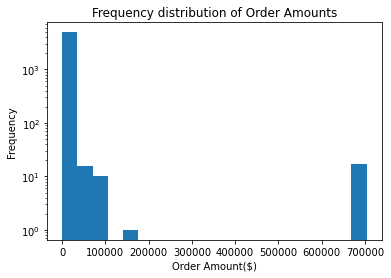

In [35]:
# Let's plot a frequency distribution of order amount
x = data['order_amount']
plt.hist(x, bins=20, log=True)

plt.title("Frequency distribution of Order Amounts")
plt.xlabel("Order Amount($)")
plt.ylabel("Frequency")

plt.show()

The above histogram or frequency distribution plot is skewed becaue of the higher order amounts, 
it does not follow a normal distribution, i.e. have a bell shaped curve. 
Hence an average order value might no be an appropriate measure to centarlize the dataset

# What could be going wrong with the calculation of average order value?

The average order value is skewed, large order_amounts at store 42 and 78 explain the skew. 
The average order value is clearly influenced by these outliers. 
The frequency distribution plot also shows that the order_amount is not normally distributed.

Therefore average order value might not be the best way to accurately reflect an order value in the dataset. 

# What metric would you report for this dataset?

The metric ideally depends on the business question we are trying to answer.

In this case, if we are trying to find an order value that centralizes the dataset, 
I would recommend that median is a better metric since it is not as strongly influenced by skewed values. 

I wouldn't go with mode as a metric since every store sells a different sneaker style that has different unit price. 

# What is its value?

In [116]:
median_amt = data['order_amount'].median()

print("The median order amount is: $", median_amt)

The median order amount is: $ 284.0


# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. 

Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

# a.	How many orders were shipped by Speedy Express in total?

Query:

SELECT count(*) as Total_Orders_Shipped, S.ShipperName

FROM

Orders O

JOIN Shippers S

ON O.ShipperID = S.ShipperID

AND S.ShipperName = 'Speedy Express'

Answer:

A total of 54 orders were shipped by Speedy Express

# b.	What is the last name of the employee with the most orders?

Query:

SELECT max(O.cnt) as Order_Count, E.LastName

FROM

(SELECT count(*) as cnt, EmployeeID FROM Orders GROUP BY EmployeeID) O

JOIN Employees E

ON O.EmployeeID = E.EmployeeID

Answer:

Employee whose last name is Peacock has most order count of 40


# c.	What product was ordered the most by customers in Germany?

Query:

SELECT od.ProductID, p.ProductName, sum(od.Quantity) as total_qty 

FROM OrderDetails od

JOIN Products p

ON od.ProductID = p.ProductID

JOIN Orders o

ON od.OrderID = o.OrderID

JOIN Customers c

ON o.CustomerID = c.CustomerID

AND c.Country = 'Germany'

GROUP BY od.ProductID, p.ProductName

ORDER BY total_qty desc

LIMIT 1

Answer:

Boston Crab Meat, with a total sold quantity of 160 was the most ordered product by customers in Germany.
